# Stock Market Analysis¶

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

### Basic Analysis of Stock Information¶

In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import time
import datetime

from pandas_datareader import DataReader

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
period1 = int(time.mktime(datetime.datetime(2020, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 1, 1, 23, 59).timetuple()))

interval = '1d' # 1d, 1m

for ticker in tech_list:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    globals()[ticker] = pd.read_csv(query_string,index_col=0)

In [5]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.096458,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.376083,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.960762,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.612930,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.797081,132079200


In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,95.267668,96.661769,93.912796,95.347075,94.599327,1.575646e+08
std,22.011907,22.094637,21.579913,21.809814,21.851513,6.983072e+07
min,57.020000,57.125000,53.152500,56.092499,55.483528,4.669130e+07
25%,77.025002,78.167503,76.220001,77.385002,76.385834,1.108432e+08
50%,91.279999,92.970001,90.910004,91.632500,90.883034,1.380234e+08
75%,115.982498,117.279999,114.129997,115.750000,115.010269,1.875728e+08
max,138.050003,138.789993,134.339996,136.690002,136.050781,4.265100e+08


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


<AxesSubplot:xlabel='Date'>

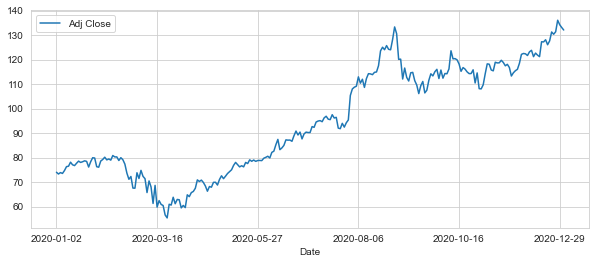

In [8]:
# A historical view of the closing price

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

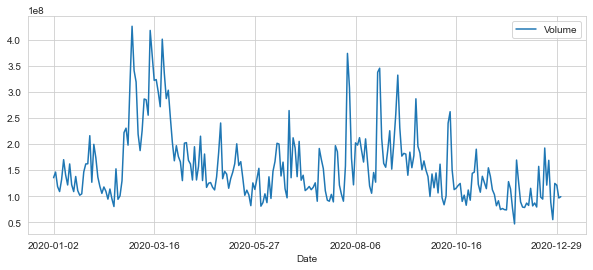

In [9]:
# The total volume of stock being traded each day in 2020

AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [10]:
# Moving Average

ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

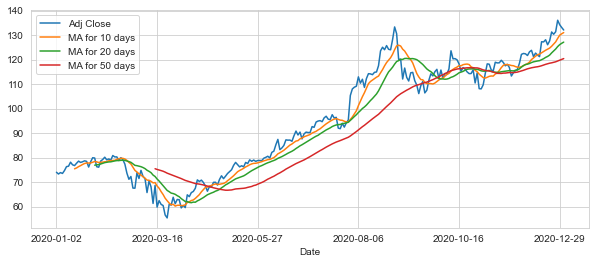

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

### Daily Return Analysis¶

Now we are going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

<AxesSubplot:xlabel='Date'>

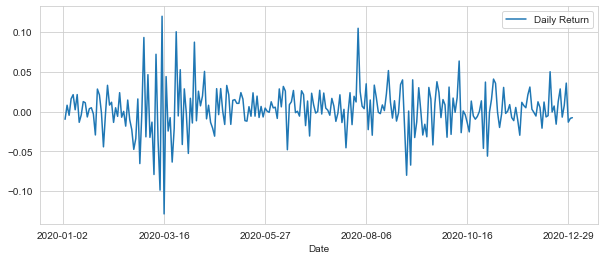

In [12]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True)

Now let's get an overall look at the average daily return using a histogram.

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

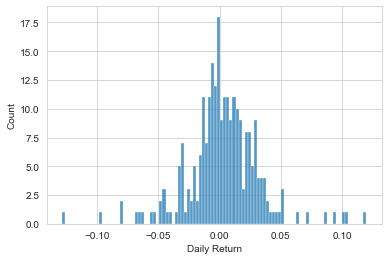

In [13]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100)

Now we will analyze the returns of all the stocks in our list by creating a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
closing_df = DataFrame()

closing_df['AAPL'] = AAPL['Adj Close']
closing_df['GOOG'] = GOOG['Adj Close']
closing_df['MSFT'] = MSFT['Adj Close']
closing_df['AMZN'] = AMZN['Adj Close']

closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-02,74.096458,1367.369995,157.903458,1898.010010
2020-01-03,73.376083,1360.660034,155.937317,1874.969971
2020-01-06,73.960762,1394.209961,156.340347,1902.880005
2020-01-07,73.612930,1393.339966,154.914886,1906.859985
2020-01-08,74.797081,1404.319946,157.382431,1891.969971


In [15]:
# Daily Returns

tech_rets = closing_df.pct_change()

tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.004907,-0.012452,-0.012139
2020-01-06,0.007968,0.024657,0.002585,0.014886
2020-01-07,-0.004703,-0.000624,-0.009118,0.002092
2020-01-08,0.016086,0.007880,0.015928,-0.007809


In [16]:
tech_rets.mean()

AAPL    0.002728
GOOG    0.001275
MSFT    0.001717
AMZN    0.002437
dtype: float64

<AxesSubplot:xlabel='Date'>

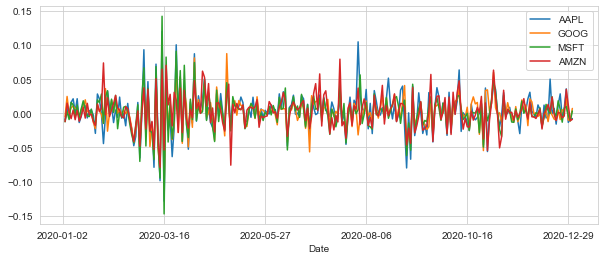

In [17]:
tech_rets.plot(figsize=(10,4),legend=True)

Now we can compare the daily percentage return of two stocks to check how correlated.

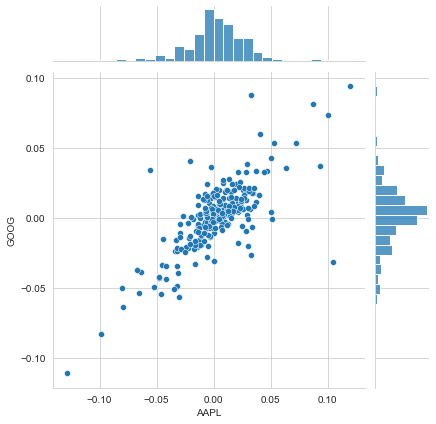

In [18]:
sns.jointplot(x='AAPL',y='GOOG',data=tech_rets,kind='scatter')

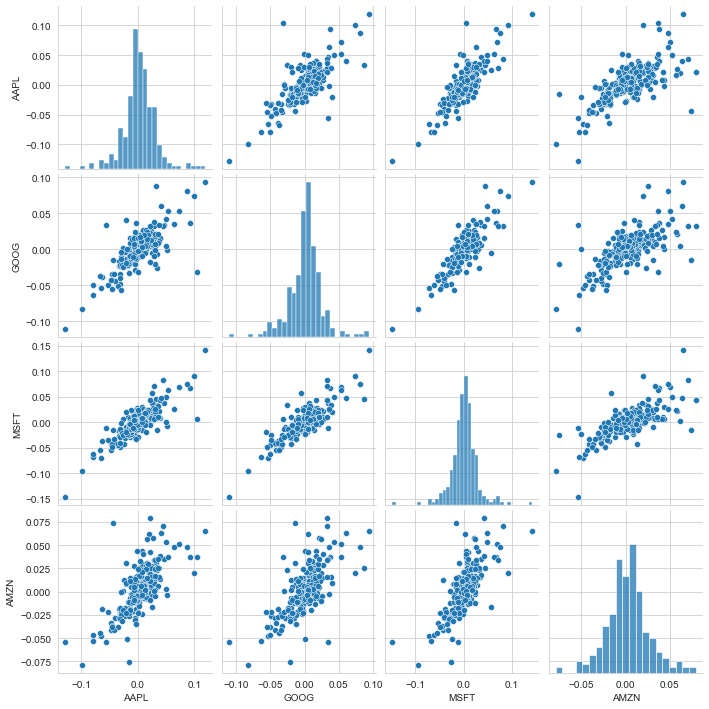

In [19]:
sns.pairplot(data=tech_rets.dropna())

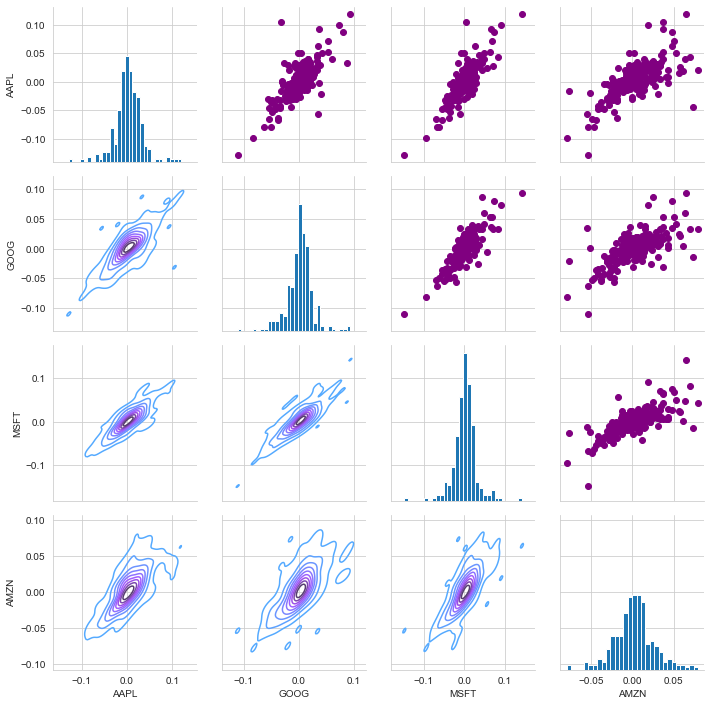

In [20]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

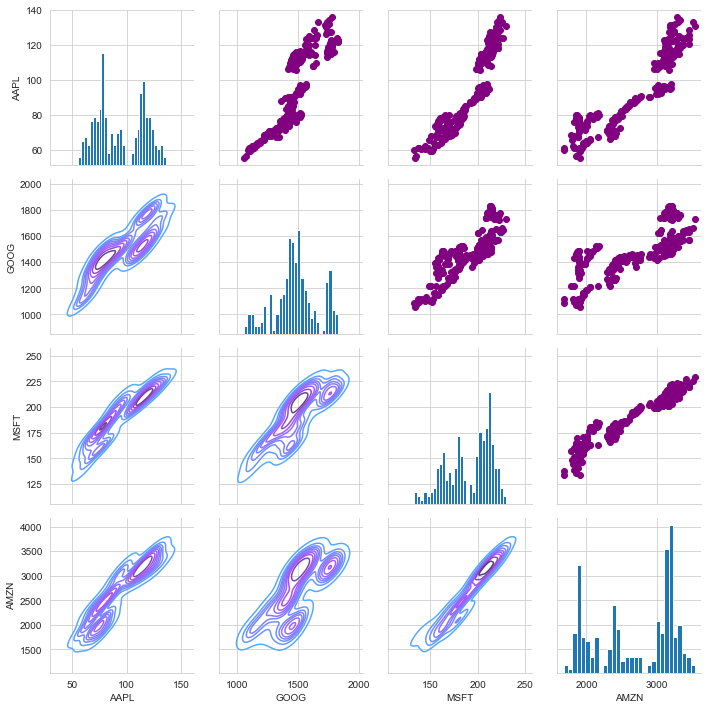

In [21]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

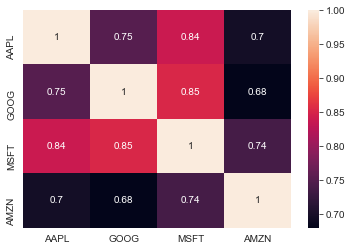

In [22]:
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True)

<AxesSubplot:>

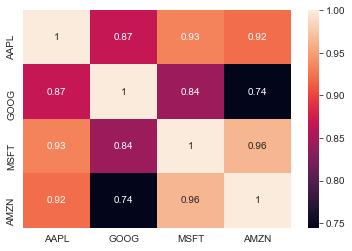

In [23]:
closing_df_corr= closing_df.dropna().corr()
sns.heatmap(closing_df_corr, annot=True)

##### We see here numerically and visually that all the technology companies are strongly and positively correlated.

### Risk Analysis¶

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

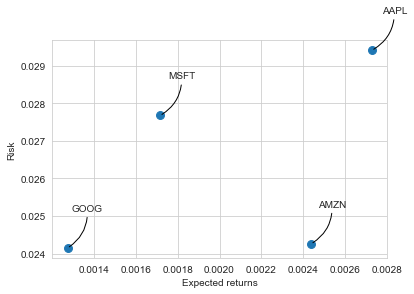

In [24]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext=(35,35),
        textcoords = 'offset points',ha = 'right',va='bottom',
        arrowprops = dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3',color='black'))

##### Investing in AMAZON was the best choice in 2020 (High returns with Low risk)

### Value at Risk

We will define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There is several methods we can use for estimating a value at risk. We will see some of them in action.

# Value at risk using the "bootstrap" method

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

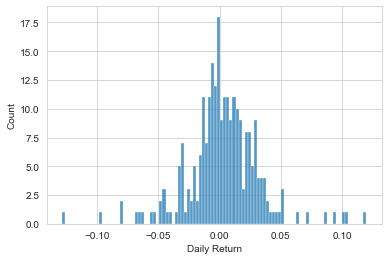

In [26]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100)

In [27]:
rets['AAPL'].quantile(0.05)

-0.04486865751871845

With 95% of confidence, the worst daily loss will not exceed 4.48% for Apple stock.

In [28]:
rets['AAPL'].quantile(0.95)

0.04224667243440021

With 95% of confidence, the best daily win will not exceed 4.42% for Apple stock.

# Value at Risk using the Monte Carlo method

In [52]:
days = 365

dt = 1/days

mu = rets['GOOG'].mean()

sigma = rets['GOOG'].std()

In [53]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [51]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


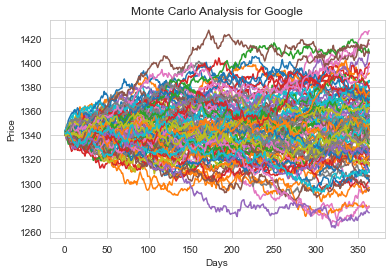

In [54]:
start_price = 1341.55

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Monte Carlo Analysis for Google')

In [55]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

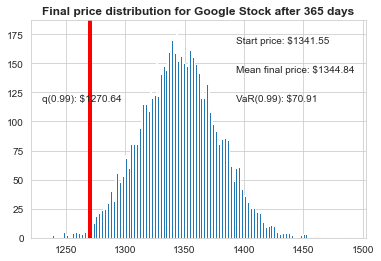

In [48]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $70.91 for every investment of 1341.55 (the price of one inital google stock).

##### This basically means for every initial stock you purchase your putting about $70.91 at risk 99% of the time from our Monte Carlo Simulation.